# Recreando las funciones de calif para materias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
# Para integrar normales
import scipy.integrate as integrate
import scipy.interpolate as interp
import scipy.stats as stats

# Argumentos que se repiten
levels = [0, 6, 6.5, 7.5, 8.5, 9.5, 10]
contour_default = {
    "levels": levels,
    "cmap": cm.coolwarm
}

label_default = {
    "levels": levels,
    "colors": "k"
}

#plt.xkcd()

In [2]:
def calif_log(p1, x, y):
    p1 = 4.8 * np.ones_like(x)
    pars = np.stack((p1, x))
    p_lo = np.min(pars, axis=0)
    p_s = np.sum(pars, axis=0) - p_lo
    return 0.15 * p_lo + 0.45 * p_s + 0.4 * y

def despejado_log(p1, nivel, x):
    p1 = 4.8 * np.ones_like(x)
    pars = np.stack((p1, x))
    p_lo = np.min(pars, axis=0)
    p_s = np.sum(pars, axis=0) - p_lo
    return 2.5 * (nivel - 0.2 * p_lo - 0.4 * p_s)

# Vectores para reutilizar
# Son números del 0 al 10 incrementando en 0.1.
x = np.arange(0, 11, 0.1)
y = np.arange(0, 11, 0.1)
x, y = np.meshgrid(x,y)

Las calificaciones están dadas como sigue.
En cada caso $p_{\text{lo}}$, $p_{\text{hi}}$ corresponden a los parciales más bajo y más alto respectivamente, y los $p_{i}$ a los parciales restantes, sin contar a los alto o bajos, y $y$ representa el exámen final, y $c$ los controles (promedio).

- Para lógica:
 $$
 \frac{1}{5} p_{\text{lo}} + \frac{2}{5} \left( \sum_{i} p_{i} \right) + \frac{2}{5} y
 $$
 

### Plot calif lógica

Text(0.5, 1.0, 'Posibles calificaciones')

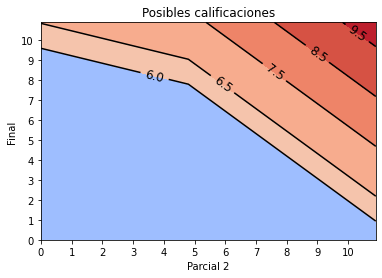

In [3]:
# Dibujando
fig, ax = plt.subplots()

# Evaluando función calificacion. Ejemplo:
z = calif_log(6.5, x,y)

# Graficando
cont = ax.contourf(x, y, z, **contour_default)
cont2 = ax.contour(x, y, z, **label_default)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
ax.set_ylabel("Final")
ax.set_xlabel("Parcial 2")
ax.clabel(cont2, fontsize=12)
ax.set_title("Posibles calificaciones")
#plt.grid()

### Calculando probabilidades

In [4]:
# Obteniendo y congelando normal
N_l = stats.multivariate_normal(mean=[5, 6], cov=5*np.eye(2))

# Efe es la curva que acota por abajo a la región
efe = lambda x: despejado_log(4.8, 6, x)

# Tomamos la "densidad recortada" y la envolvemos para que se lleve con dblquad
def f_Nl(y, x):
    return N_l.pdf(np.dstack((x,y)))

val, err = integrate.dblquad(f_Nl, 0, 10, efe, 10)
val

0.2779678465060576

In [5]:
Z = N_l.pdf(np.dstack((x,y)))

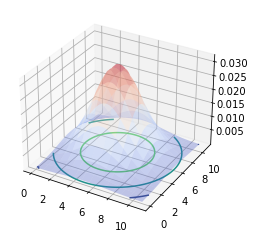

In [6]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot_surface(x, y, Z, rstride=8, cstride=8, alpha=0.3, cmap=cm.coolwarm)
cset = ax.contour(x, y, Z, zdir='z', offset=0, locator=ticker.LogLocator())

<a list of 2 text.Text objects>

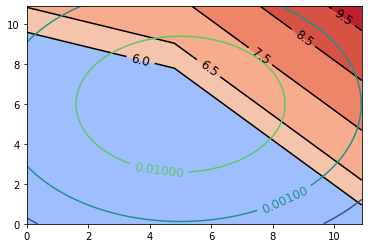

In [7]:
fig, ax = plt.subplots()

cont = ax.contourf(x, y, z, **contour_default)
cont2 = ax.contour(x, y, z, **label_default)
ax.clabel(cont2, fontsize=12)
cont_N = ax.contour(x, y, Z, locator=ticker.LogLocator())
ax.clabel(cont_N, fontsize=12)


Text(0, 0.5, 'Probabilidad')

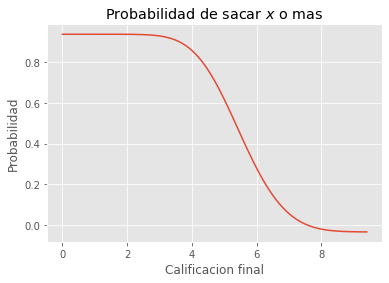

In [10]:
plt.style.use('ggplot')

# Esto apesta a ineficiente. Seguro una función pensada para resolver ODEs funciona mejor
def antiderivada(lvl):
    efe = lambda x: despejado_log(4.8, lvl, x)
    val, err = integrate.dblquad(f_Nl, 0, 10, efe, 10)

    return val 

v_int = np.vectorize(antiderivada)

equis = np.arange(0, 9.5, 0.1)

fig, ax = plt.subplots()

ax.plot(equis, v_int(equis))
ax.set_title('Probabilidad de sacar $x$ o mas')
ax.set_xlabel("Calificacion final")
ax.set_ylabel("Probabilidad")